# American Community Survey (ACS)

In [114]:
from imp import reload
import pdb
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import SVG, display

from map_maker import draw_county_data_svg

from jewish_county_data import read_jdata_counties, clean_jdata_county
from acs import ACSCountyReader, read_merge_acs

pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline

SEED = 42
random.seed(SEED)

sns.set_context('talk')

In [59]:
DATA_DIR    = '../Data/'
IMG_DIR     = '../Images/'
DEM_DIR     = ''.join([DATA_DIR, 'Demography/'])

SVG_FP = ''.join([IMG_DIR, 'temp.svg'])  # for exploring

POP_FP           = ''.join([DEM_DIR, 'ACS_15_5YR_B01003/',
                            'ACS_15_5YR_B01003_with_ann.csv'])
FOREIGN_BIRTH_FP = ''.join([DEM_DIR, 'ACS_15_5YR_B05006/', 
                                'ACS_15_5YR_B05006_with_ann.csv'])
SNGL_ANCE_FP     = ''.join([DEM_DIR, 'ACS_15_5YR_B04004/',
                            'ACS_15_5YR_B04004_with_ann.csv'])
MULT_ANCE_FP     = ''.join([DEM_DIR, 'ACS_15_5YR_B04005/',
                           'ACS_15_5YR_B04005_with_ann.csv'])
ALL_ANCE_FP      = ''.join([DEM_DIR, 'ACS_15_5YR_B04006/',
                            'ACS_15_5YR_B04006_with_ann.csv'])



In [7]:
acs_reader = ACSCountyReader(POP_FP)
acs_pop = acs_reader.read_counties()
# acs_pop.head()

In [147]:
params = [
    dict(name='Born_Isr', kw='Israel', fp=FOREIGN_BIRTH_FP),
    dict(name='Only_Isr', kw='Israel', fp=SNGL_ANCE_FP),
    dict(name='Part_Isr', kw='Israel', fp=MULT_ANCE_FP),
    ]
    
df = read_merge_acs(params)
df.head()

,Born_Isr,Only_Isr,Part_Isr
FIPS,,,
01007,0,0,7
01015,16,16,0
01045,0,0,9
01055,15,0,0
01073,32,5,174


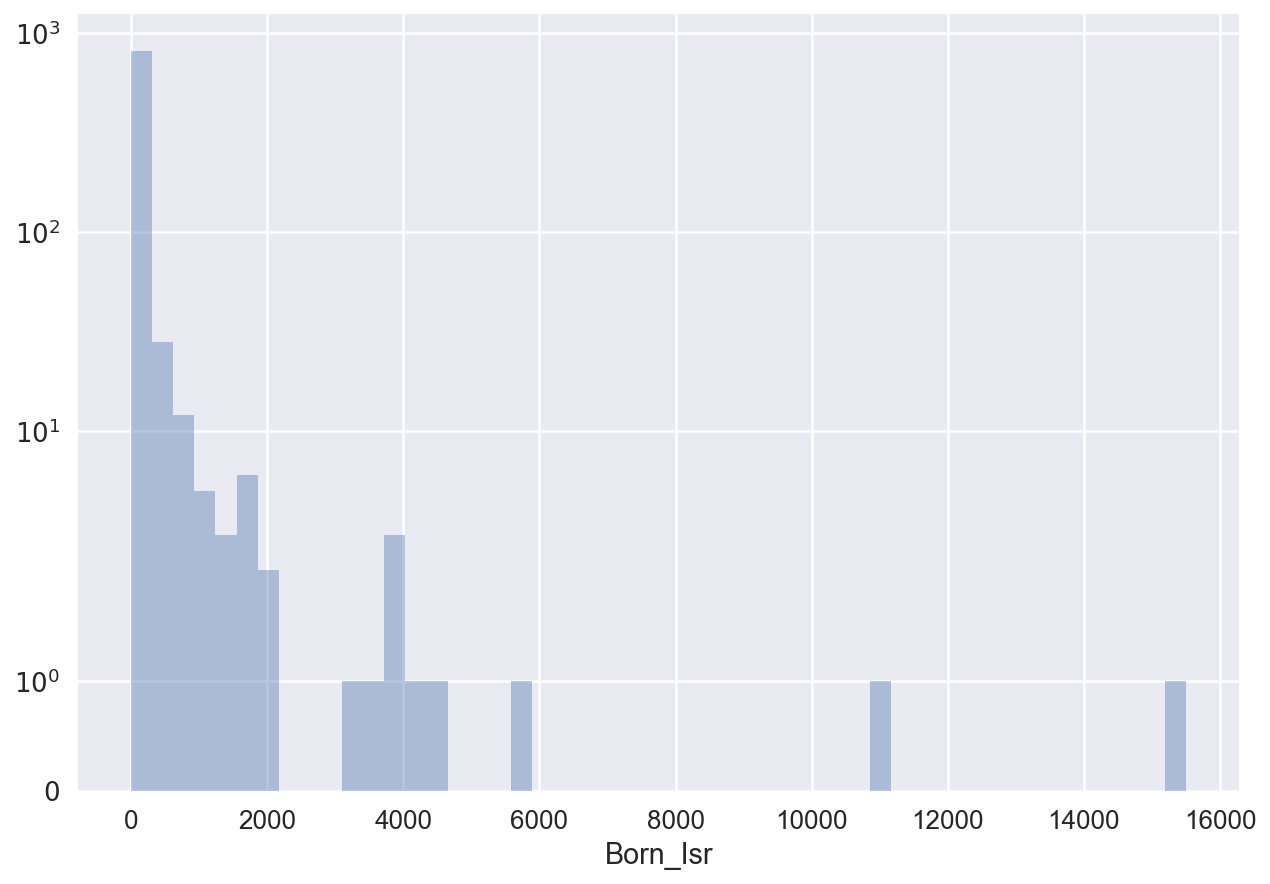

In [148]:
sns.distplot(df.Born_Isr, kde=False)
plt.yscale('symlog')